### Práctica calificada 3

**Instrucciones generales:**

- Esta evaluación es de carácter individual. No está permitida la colaboración con otros estudiantes ni el intercambio de información durante la realización de la misma.
- La evaluación debe ser completada y entregada antes de la fecha y hora límite especificadas en la plataforma del curso.
- La entrega debe realizarse a través de un repositorio de código alojado en una plataforma como GitHub, GitLab o Bitbucket.
- El enlace al repositorio debe ser compartido con el profesor de la asignatura a través de la plataforma UniVirtual.
- Se evaluará la originalidad y creatividad de las soluciones propuestas por cada estudiante.
- Se valorará positivamente el uso adecuado de conceptos y técnicas aprendidas en el curso para resolver los problemas planteados.
- Está terminantemente prohibido copiar o utilizar código generado por herramientas de generación de lenguaje natural, como modelos de lenguaje masivo (LLM) como GPT-3.

#### Ejemplo de codificación posicional
El objetivo de este notebook es entender la codificación posicional y la similitud coseno. La similitud coseno sigue siendo un enfoque sólido en NLP.

El archivo `texto.txt` es solo para ilustrar los conceptos en el notebook.

In [ ]:
!pip install gensim # Versión Gensim 4.0.0 y superior
import torch
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Este código implementa un ejemplo de procesamiento de lenguaje natural (NLP) para crear un modelo de embedding de palabras (Word2Vec) y calcular la similitud coseno entre dos palabras específicas en un texto dado.

In [ ]:
import math
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')


dprint=1 # imprime salidas si se establece en 1, predeterminado=0

# archivo ‘text.txt’
muestra = open("texto.txt", "r")
s = muestra.read()

# procesando caracteres de escape
f = s.replace("\n", " ")

data = []

# análisis de oraciones
for i in sent_tokenize(f):
	temp = []
	# tokenizar la oración en palabras
	for j in word_tokenize(i):
		temp.append(j.lower())
	data.append(temp)

# Creando modelo Skip Gram
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 512, window = 5, sg = 1)

# 1-The 2-black 3-cat 4-sat 5-on 6-the 7-couch 8-and 9-the 10-brown 11-dog 12-slept 13-on 14-the 15-rug.
palabra1='black'
palabra2='brown'
pos1=2
pos2=10
a=model2.wv[palabra1]
b=model2.wv[palabra2]

if(dprint==1):
        print(a)

# calcular similitud coseno
dot = np.dot(a, b)
norma = np.linalg.norm(a)
print(norma)
normb = np.linalg.norm(b)
print(normb)
cos = dot / (norma * normb)

aa = a.reshape(1,512)
ba = b.reshape(1,512)
cos_lib = cosine_similarity(aa, ba)

[-0.06562666 -0.05351061 -0.00367221  0.06062042 -0.00825019  0.03129761
  0.04094656 -0.0424781   0.02367186 -0.00713359  0.02598262 -0.00719514
 -0.00289508 -0.00929283 -0.02900256 -0.02728165  0.03671551  0.07769296
 -0.07263705 -0.04485688  0.04485427 -0.03313118  0.10418661  0.02434326
 -0.02192764  0.00515197  0.03559645  0.03915194 -0.00977631 -0.10745304
 -0.01346472  0.03907425  0.02671207 -0.01067893 -0.00663914  0.00800821
  0.04495844 -0.05629048 -0.00073539 -0.01153074 -0.08249988  0.08180326
 -0.07897271 -0.04355659  0.05569189  0.01140373 -0.00112619  0.05680707
  0.0901883   0.09711304 -0.05737246  0.04957561  0.05798693  0.10256263
 -0.06556486 -0.00416581  0.0521906  -0.04471232  0.0099958   0.05621516
  0.0546289  -0.03182605 -0.00359466  0.02774827  0.0114772  -0.0040597
 -0.03139506  0.03170055 -0.02370839 -0.02381434 -0.00193404 -0.05785833
  0.01020833 -0.07639617  0.04624535 -0.0022714   0.05824702  0.02433532
  0.00560469  0.08525062  0.06666046 -0.03751861  0.

Este código implementa un ejemplo de codificación posicional, una técnica utilizada en modelos como el Transformer para incorporar información sobre la posición de las palabras en la secuencia. La codificación posicional añade un vector a cada palabra en la secuencia que contiene información sobre su posición relativa, permitiendo al modelo entender el orden de las palabras.

In [ ]:
pe1=aa.copy()
pe2=aa.copy()
pe3=aa.copy()
paa=aa.copy()
pba=ba.copy()
d_model=512
max_print=d_model
max_length=20

for i in range(0, max_print,2):
                pe1[0][i] = math.sin(pos1 / (10000 ** ((2 * i)/d_model)))
                paa[0][i] = (paa[0][i]*math.sqrt(d_model))+ pe1[0][i]
                pe1[0][i+1] = math.cos(pos1 / (10000 ** ((2 * i)/d_model)))
                paa[0][i+1] = (paa[0][i+1]*math.sqrt(d_model))+pe1[0][i+1]
                if dprint==1:
                        print(i,pe1[0][i],i+1,pe1[0][i+1])
                        print(i,paa[0][i],i+1,paa[0][i+1])
                        print("\n")

#print(pe1)
# Un método en Pytorch usando torch.exp y math.log :
max_len=max_length
pe = torch.zeros(max_len, d_model)
posicion = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
pe[:, 0::2] = torch.sin(posicion * div_term)
pe[:, 1::2] = torch.cos(posicion * div_term)
#print(pe[:, 0::2])

0 0.9092974 1 -0.41614684
0 -0.57566434 1 -1.6269537


2 0.95814437 3 -0.28628543
2 0.8750518 3 1.0853981


4 0.98704624 5 -0.16043596
4 0.8003656 5 0.5477482


6 0.9991642 7 -0.040876657
6 1.9256792 7 -1.0020463


8 0.99748 9 0.07094825
8 1.533113 9 -0.09046645


10 0.984703 11 0.17424123
10 1.5726225 11 0.011433708


12 0.9632266 13 0.2686903
12 0.89771837 13 0.058417596


14 0.9351183 15 0.35433567
14 0.27886534 15 -0.2629776


16 0.9021307 17 0.43146282
16 1.732908 17 2.1894538


18 0.8657256 19 0.5005189
18 -0.77786326 19 -0.5144765


20 0.8271038 21 0.5620492
20 1.8420401 21 -0.18762378


22 0.7872378 23 0.6166495
22 3.1447117 23 1.1674745


24 0.74690354 25 0.6649324
24 0.2507377 25 0.78150815


26 0.7067105 27 0.7075028
26 1.5121663 27 1.59341


28 0.6671291 29 0.7449421
28 0.44591638 29 -1.6864426


30 0.62851435 31 0.777798
30 0.32384259 31 1.6619474


32 0.5911271 33 0.8065784
32 1.1955521 33 0.56494176


34 0.55515176 35 0.8317491
34 0.40492505 35 1.0129541


36 0.5207113 3

In [ ]:
for i in range(0, max_print,2):
                pe2[0][i] = math.sin(pos2 / (10000 ** ((2 * i)/d_model)))
                pba[0][i] = (pba[0][i]*math.sqrt(d_model))+ pe2[0][i]

                pe2[0][i+1] = math.cos(pos2 / (10000 ** ((2 * i)/d_model)))
                pba[0][i+1] = (pba[0][i+1]*math.sqrt(d_model))+ pe2[0][i+1]

                if dprint==1:
                        print(i,pe2[0][i],i+1,pe2[0][i+1])
                        print(i,paa[0][i],i+1,paa[0][i+1])
                        print("\n")

print(palabra1,palabra2)
cos_lib = cosine_similarity(aa, ba)
print(cos_lib,"similitud de palabras")
cos_lib = cosine_similarity(pe1, pe2)
print(cos_lib,"similitud posicional")
cos_lib = cosine_similarity(paa, pba)
print(cos_lib,"similitud de codificación posicional")

if dprint==1:
        print(palabra1)
        print("embedding")
        print(aa)
        print("codificación posicional")
        print(pe1)
        print("embedding codificada")
        print(paa)

        print(palabra2)
        print("embedding")
        print(ba)
        print("codificación posicional")
        print(pe2)
        print("embedding codificada")
        print(pba)


0 -0.5440211 1 -0.8390715
0 -0.57566434 1 -1.6269537


2 0.118776485 3 -0.992921
2 0.8750518 3 1.0853981


4 0.69263417 5 -0.72128904
4 0.8003656 5 0.5477482


6 0.9791748 7 -0.2030191
6 1.9256792 7 -1.0020463


8 0.93763274 9 0.34762743
8 1.533113 9 -0.09046645


10 0.640478 11 0.7679765
10 1.5726225 11 0.011433708


12 0.209077 13 0.9778992
12 0.89771837 13 0.058417596


14 -0.23791768 15 0.97128534
14 0.27886534 15 -0.2629776


16 -0.61293674 17 0.790132
16 1.732908 17 2.1894538


18 -0.8675198 19 0.4974026
18 -0.77786326 19 -0.5144765


20 -0.987656 21 0.15663856
20 1.8420401 21 -0.18762378


22 -0.9836992 23 -0.17982185
22 3.1447117 23 1.1674745


24 -0.87976724 25 -0.47540468
24 0.2507377 25 0.78150815


26 -0.70512336 27 -0.70908463
26 1.5121663 27 1.59341


28 -0.48830694 29 -0.87267196
28 0.44591638 29 -1.6864426


30 -0.2538085 31 -0.96725446
30 0.32384259 31 1.6619474


32 -0.02068353 33 -0.9997861
32 1.1955521 33 0.56494176


34 0.1975573 35 -0.98029137
34 0.40492505 35 1.0

### Ejercicios (4 puntos)

1. Implementa una función de codificación posicional en PyTorch que acepte la longitud máxima de la secuencia `(max_len)` y la dimensión del modelo `(d_model)`. La función debe devolver un tensor de codificaciones posicionales.
2. Visualiza las codificaciones posicionales generadas por la función anterior utilizando matplotlib.
3. Aplica la codificación posicional a un conjunto de incrustaciones de palabras. Usa las incrustaciones generadas por Word2Vec y combina estas con las codificaciones posicionales.
4. Compara la similitud coseno entre incrustaciones de palabras antes y después de aplicar la codificación posicional.

#### 1


Codificamos una funcion para la codificación posicional que acepte los datos requeridos, usando la base de los ejemplos anteriores.

In [ ]:
def positional_encoding(max_len, d_model):
    pe = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    return pe


Una función auxiliar para aplicarlo posteriormente a los valores.

In [ ]:
def apply_positional_encoding(embedding, position, d_model):
    pe = positional_encoding(1, d_model)
    pe[0, 0::2] = torch.sin(position / (10000 ** (torch.arange(0, d_model, 2).float() / d_model)))
    pe[0, 1::2] = torch.cos(position / (10000 ** (torch.arange(0, d_model, 2).float() / d_model)))
    return embedding + pe[0].numpy()

#### 2

Mostramos a continuación el mapa calor que se genera con los valores obtenidos.

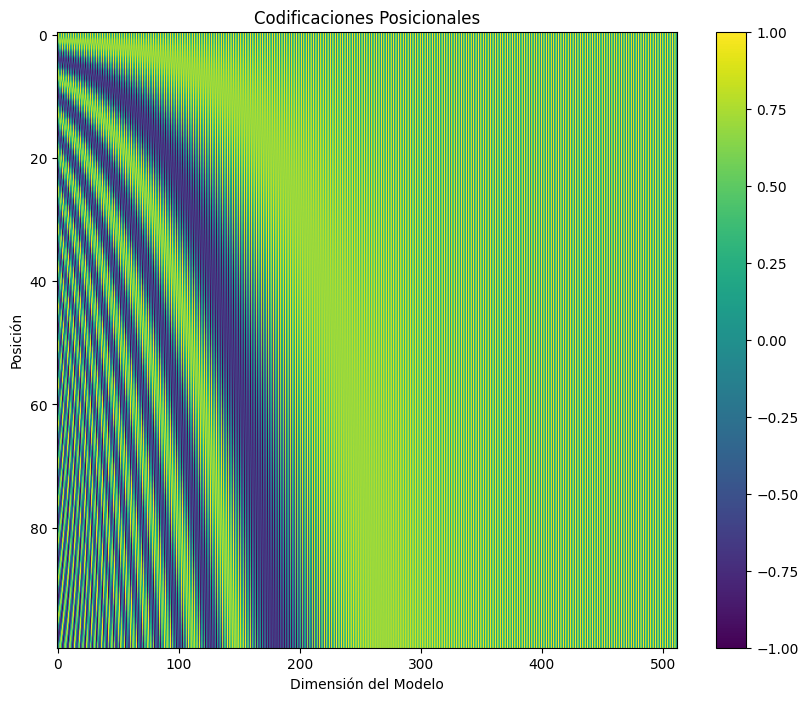

In [ ]:
max_len = 100
d_model = 512
pe = positional_encoding(max_len, d_model).numpy()

plt.figure(figsize=(10, 8))
plt.imshow(pe, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Codificaciones Posicionales')
plt.xlabel('Dimensión del Modelo')
plt.ylabel('Posición')
plt.show()


El patrón en el mapa de calor demuestra la naturaleza periódica de las funciones seno y coseno.

#### 3

Formamos un modelo con las palabras que se usaron en texto.txt.

In [ ]:
sentences = [
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.",
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.",
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.",
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.",
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.",
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.",
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.",
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.",
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.",
    "The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug."
]

tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

model = Word2Vec(tokenized_sentences, min_count=1, vector_size=512, window=5, sg=1)

Podemos observar la similitud coseno que se forma.

In [ ]:
word1 = 'dog'
word2 = 'cat'
pos1 = 2
pos2 = 10
embedding1 = model.wv[word1]
embedding2 = model.wv[word2]
cos_sim = cosine_similarity([embedding1], [embedding2])
print(f"Similitud coseno entre '{word1}' y '{word2}': {cos_sim[0][0]}")

Similitud coseno entre 'dog' y 'cat': 0.22375807166099548


Aplicamos las codificaciones posicionales.

In [ ]:
max_len = 100
d_model = 512
pe = positional_encoding(max_len, d_model).numpy()

#### 4

In [ ]:
# Aplicar la codificación posicional
embedding1_pe = apply_positional_encoding(embedding1, pos1, 512)
embedding2_pe = apply_positional_encoding(embedding2, pos2, 512)

# Calcular la similitud coseno después de aplicar la codificación posicional
cos_sim_pe = cosine_similarity([embedding1_pe], [embedding2_pe])
print(f"Similitud coseno con codificación posicional entre '{word1}' y '{word2}': {cos_sim_pe[0][0]}")

# Comparar las similitudes
print(f"Similitud original: {cos_sim[0][0]}")
print(f"Similitud con codificación posicional: {cos_sim_pe[0][0]}")

Similitud coseno con codificación posicional entre 'dog' y 'cat': 0.7225648164749146
Similitud original: 0.22375807166099548
Similitud con codificación posicional: 0.7225648164749146


Hay un aumento significativo de la similitud coseno tras aplicar codificaciones posicionales, esto podría indicar que la información posicional hace que las incrustaciones de "perro" y "gato" sean más similares cuando se consideran sus posiciones en la secuencia.

### Autoatención

Basado en [Illustrated: Self-Attention](https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a) de Raimi Karim.

¿Qué tienen en común BERT, RoBERTa, ALBERT, SpanBERT, DistilBERT, SesameBERT, SemBERT, MobileBERT, TinyBERT y CamemBERT?  Respuesta: autoatención. No solo estamos hablando de arquitecturas que llevan el nombre "BERT", sino más correctamente de arquitecturas basadas en Transformers. Las arquitecturas basadas en transformers, que se utilizan principalmente en la modelización de tareas de comprensión del lenguaje, evitan el uso de recurrencia en las redes neuronales (RNN) y en su lugar confían completamente en los mecanismos de autoatención para establecer dependencias globales entre las entradas y salidas.

#### Paso 0. ¿Qué es la autoatención?

Si estás pensando si la autoatención es similar a la atención, entonces la respuesta es sí. Fundamentalmente comparten el mismo concepto y
muchas operaciones matemáticas comunes. Un módulo de autoatención toma `n` entradas y devuelve `n` salidas. ¿Qué sucede en este módulo? En términos sencillos, el mecanismo de autoatención permite que las entradas interactúen entre sí (“auto”) y descubran a quién deben prestar más atención ('atención'). Las salidas son agregados de estas interacciones y puntuaciones de atención.

A continuación, vamos a explicar e implementar:

1. Preparar entradas
2. Inicializar pesos
3. Derivar clave, consulta y valor
4. Calcular puntuaciones de atención para la `Entrada 1`
5. Calcular softmax
6. Multiplicar puntuaciones con valores
7. Sumar valores ponderados para obtener la `Salida`
8. Repetir pasos 4-7 para la `Entrada 2` y la `Entrada 3`

In [ ]:
import torch

**1. Preparar entradas**

Para este ejercico, por simplicidad, comenzamos con `3` entradas, cada una con una dimensión de `4`.

![texto alternativo](https://miro.medium.com/max/1973/1*hmvdDXrxhJsGhOQClQdkBA.png)

In [ ]:
x = [
  [1, 0, 1, 0], # Entrada 1
  [0, 2, 0, 2], # Entrda 2
  [1, 1, 1, 1]  # Entrada 3
 ]
x = torch.tensor(x, dtype=torch.float32)
x

tensor([[1., 0., 1., 0.],
        [0., 2., 0., 2.],
        [1., 1., 1., 1.]])

**Paso 2: Inicializar pesos**

Cada entrada debe tener tres representaciones (ver diagrama abajo). Estas representaciones se llaman clave (naranja), consulta (rojo), y
valor (morado). Para este ejemplo, supongamos que queremos que estas representaciones tengan una dimensión de 3. Debido a que cada entrada
tiene una dimensión de 4, esto significa que cada conjunto de pesos debe tener una forma de $4\times 3$.

![texto del enlace](https://miro.medium.com/max/1975/1*VPvXYMGjv0kRuoYqgFvCag.gif)

In [ ]:
w_key = [
  [0, 0, 1],
  [1, 1, 0],
  [0, 1, 0],
  [1, 1, 0]
]
w_query = [
  [1, 0, 1],
  [1, 0, 0],
  [0, 0, 1],
  [0, 1, 1]
]
w_value = [
  [0, 2, 0],
  [0, 3, 0],
  [1, 0, 3],
  [1, 1, 0]
]
w_key = torch.tensor(w_key, dtype=torch.float32)
w_query = torch.tensor(w_query, dtype=torch.float32)
w_value = torch.tensor(w_value, dtype=torch.float32)

print("Pesos para key: \n", w_key)
print("Pesos para query: \n", w_query)
print("Pesos para  value: \n", w_value)

Pesos para key: 
 tensor([[0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 0.],
        [1., 1., 0.]])
Pesos para query: 
 tensor([[1., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 1.]])
Pesos para  value: 
 tensor([[0., 2., 0.],
        [0., 3., 0.],
        [1., 0., 3.],
        [1., 1., 0.]])


**Paso 3: Derivar clave, consulta y valor**

Ahora que tenemos los tres conjuntos de pesos, obtengamos las
representaciones de clave, consulta y valor para cada entrada.

Obteniendo las claves:

 ```

                   [0, 0, 1]
    [1, 0, 1, 0]   [1, 1, 0]   [0, 1, 1]
    [0, 2, 0, 2] x [0, 1, 0] = [4, 4, 0]
    [1, 1, 1, 1]   [1, 1, 0]   [2, 3, 1]
   ```
![texto alternativo](https://miro.medium.com/max/1975/1*dr6NIaTfTxEWzxB2rc0JWg.gif)



Obteniendo los valores:

```

                   [0, 2, 0]
    [1, 0, 1, 0]   [0, 3, 0]   [1, 2, 3]
    [0, 2, 0, 2] x [1, 0, 3] = [2, 8, 0]
    [1, 1, 1, 1]   [1, 1, 0]   [2, 6, 3]
   ```

![texto alternativo](https://miro.medium.com/max/1975/1*5kqW7yEwvcC0tjDOW3Ia-A.gif)


Obteniendo las consultas:

  ```

                   [1, 0, 1]
    [1, 0, 1, 0]   [1, 0, 0]   [1, 0, 2]
    [0, 2, 0, 2] x [0, 0, 1] = [2, 2, 2]
    [1, 1, 1, 1]   [0, 1, 1]   [2, 1, 3]

  ```
![texto alternativo](https://miro.medium.com/max/1975/1*wO_UqfkWkv3WmGQVHvrMJw.gif)

En la práctica, se puede agregar un vector de sesgo al producto de la multiplicación de matrices.

In [ ]:
keys = x @ w_key
querys = x @ w_query
values = x @ w_value

print("Keys: \n", keys)
print("Querys: \n", querys)
print("Values: \n", values)


Keys: 
 tensor([[0., 1., 1.],
        [4., 4., 0.],
        [2., 3., 1.]])
Querys: 
 tensor([[1., 0., 2.],
        [2., 2., 2.],
        [2., 1., 3.]])
Values: 
 tensor([[1., 2., 3.],
        [2., 8., 0.],
        [2., 6., 3.]])


**Paso 4: Calcular puntuaciones de atención**

![texto alternativo](https://miro.medium.com/max/1973/1*u27nhUppoWYIGkRDmYFN2A.gif)

Para obtener puntuaciones de atención, comenzamos tomando el producto punto entre la consulta (rojo) de la `Entrada 1` con todas las claves
(naranja), incluida ella misma. Dado que hay 3 representaciones de clave (porque tenemos 3 entradas), obtenemos 3 puntuaciones de atención (azul).

 ```

                [0, 4, 2]
    [1, 0, 2] x [1, 4, 3] = [2, 4, 4]
                [1, 0, 1]
```

Observa que solo usamos la consulta de la `Entrada 1`. Luego repetiremos este mismo paso para las otras consultas.

La operación anterior se conoce como atención por producto punto, una de las varias funciones de puntuación. Otras funciones de puntuación incluyen producto punto escalado y aditivo/concat.

In [ ]:
attn_scores = querys @ keys.T
print(attn_scores)

tensor([[ 2.,  4.,  4.],
        [ 4., 16., 12.],
        [ 4., 12., 10.]])


**Paso 5: Calcular softmax**

![texto alternativo](https://miro.medium.com/max/1973/1*jf__2D8RNCzefwS0TP1Kyg.gif)

Aplicar softmax a estas puntuaciones de atención (azul).
    
```
    softmax([2, 4, 4]) = [0.0, 0.5, 0.5]
   ```

In [ ]:
from torch.nn.functional import softmax
attn_scores_softmax = softmax(attn_scores, dim=-1)
print(attn_scores_softmax)
# Para mayor legibilidad, aproxime lo anterior de la siguiente manera
attn_scores_softmax = [
      [0.0, 0.5, 0.5],
      [0.0, 1.0, 0.0],
      [0.0, 0.9, 0.1]
    ]
attn_scores_softmax = torch.tensor(attn_scores_softmax)
print(attn_scores_softmax)

tensor([[6.3379e-02, 4.6831e-01, 4.6831e-01],
        [6.0337e-06, 9.8201e-01, 1.7986e-02],
        [2.9539e-04, 8.8054e-01, 1.1917e-01]])
tensor([[0.0000, 0.5000, 0.5000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.9000, 0.1000]])


**Paso 6: Multiplicar puntuaciones con valores**

![texto alternativo](https://miro.medium.com/max/1973/1*9cTaJGgXPbiJ4AOCc6QHyA.gif)

Las puntuaciones de atención softmax para cada entrada (azul) se multiplican con su correspondiente valor (morado). Esto da como
resultado 3 vectores de alineación (amarillo). En este cuaderno, nos referiremos a ellos como valores ponderados.

```
    1: 0.0 * [1, 2, 3] = [0.0, 0.0, 0.0]
    2: 0.5 * [2, 8, 0] = [1.0, 4.0, 0.0]
    3: 0.5 * [2, 6, 3] = [1.0, 3.0, 1.5]
```

In [ ]:
valores_ponderados = values[:,None] * attn_scores_softmax.T[:,:,None]
print(valores_ponderados)

tensor([[[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[1.0000, 4.0000, 0.0000],
         [2.0000, 8.0000, 0.0000],
         [1.8000, 7.2000, 0.0000]],

        [[1.0000, 3.0000, 1.5000],
         [0.0000, 0.0000, 0.0000],
         [0.2000, 0.6000, 0.3000]]])


**Paso 7: Sumar valores ponderados**

![texto alternativo](https://miro.medium.com/max/1973/1*1je5TwhVAwwnIeDFvww3ew.gif)

Tomar todos los valores ponderados (amarillo) y sumarlos elemento por elemento:

```

      [0.0, 0.0, 0.0]
    + [1.0, 4.0, 0.0]
    + [1.0, 3.0, 1.5]
    -----------------
    = [2.0, 7.0, 1.5]

```

El vector resultante `[2.0, 7.0, 1.5]` (verde oscuro) es la `Salida 1`, que se basa en la representación de consulta de la Entrada 1 interactuando con todas las demás claves, incluida ella misma.

**Paso 8: Repetir para `Entrada 2` y `Entrada 3`**

![texto alternativo](https://miro.medium.com/max/1973/1*G8thyDVqeD8WHim_QzjvFg.gif)

La dimensión de consulta y clave debe ser siempre la misma debido a la función de puntuación de producto punto. Sin embargo, la dimensión de valor puede ser diferente de consulta y clave. La salida resultante, por consiguiente, seguirá la dimensión de valor.

In [ ]:
salidas = valores_ponderados.sum(dim=0)
print(salidas)

tensor([[2.0000, 7.0000, 1.5000],
        [2.0000, 8.0000, 0.0000],
        [2.0000, 7.8000, 0.3000]])


### Ejercicios (10 puntos)

1 . Extiende el código proporcionado para implementar una capa de multiatención con múltiples cabeceras de atención. Cada cabecera de atención tendrá sus propios pesos y realizará autoatención de forma independiente (2 puntos)

Tareas:

- Divide la entrada en `h` partes, donde `h` es el número de cabeceras de atención.
- Inicializa pesos separados para cada cabecera de atención.
- Realiza autoatención en cada cabecera de atención de forma independiente.
- Concatena las salidas de todas las cabecera de atención.
- Implementa una capa lineal para combinar las salidas concatenadas.

Preguntas:

* ¿Cómo afecta el número de cabeceras de atención al rendimiento y la capacidad del modelo?
* ¿Cuáles son los beneficios y las desventajas de utilizar múltiples cabecera de atención en comparación con una sola cabecera?


2 . Modifica el código para incluir una función que visualice las puntuaciones de atención. Esto puede ayudar a entender cómo el modelo distribuye su atención entre las diferentes entradas (1 punto(

Tareas:

- Implementa una función para visualizar las puntuaciones de atención utilizando matplotlib o cualquier otra biblioteca de visualización.
- Realiza la visualización para diferentes entradas y discute cómo varían las puntuaciones de atención.

Preguntas:

- ¿Qué patrones observas en las puntuaciones de atención para diferentes entradas?
- ¿Cómo puedes interpretar estos patrones en términos de la importancia relativa de las diferentes partes de la entrada?

3 . Implementa la versión escalada del producto punto en el cálculo de las puntuaciones de atención, que es una práctica común en los transformers (2 puntos)

Tareas:

- Modifica el cálculo de las puntuaciones de atención para incluir el factor de escala $frac{1}{\sqrt{d_k}}$ donde $d_k$ es la dimensión de la clave.
- Compara los resultados con y sin escalado del producto punto.

Preguntas:

- ¿Por qué es necesario el escalado del producto punto en el cálculo de las puntuaciones de atención?
- ¿Qué impacto tiene el escalado en la estabilidad numérica y el rendimiento del modelo?.
-
4 . Implementa y compara otras funciones de puntuación de atención como la atención aditiva y la atención concatenada (2 puntos).

Tareas:

- Implementa la atención aditiva utilizando una red neuronal de una capa.
- Implementa la atención concatenada donde las consultas y las claves se concatenan antes de calcular las puntuaciones de atención.
- Compara el rendimiento y la eficacia de las diferentes funciones de puntuación.

Preguntas:

- ¿Cuáles son las diferencias en el rendimiento de las diferentes funciones de puntuación de atención?
- ¿En qué casos sería preferible usar atención aditiva sobre la atención por producto punto?

5 . Explora técnicas de regularización específicas para modelos de atención, como Dropout en las puntuaciones de atención y Regularización L2. (1 punto)

Tareas:

- Implementa Dropout en las puntuaciones de atención antes de aplicar softmax.
- Añade regularización L2 a los pesos de las consultas, claves y valores.
- Analiza el impacto de estas técnicas de regularización en el rendimiento del modelo.
  
Preguntas:

- ¿Cómo afectan las técnicas de regularización al rendimiento y la generalización del modelo?
- ¿Qué técnicas de regularización son más efectivas para prevenir el sobreajuste en modelos basados en atención?

6 .  Aplica el mecanismo de autoatención y multiatención en tareas específicas de procesamiento de lenguaje natural, como traducción automática, resumen de texto o clasificación de texto. (2 puntos)

Tareas:

- Selecciona una tarea de NLP (por ejemplo, traducción automática).
- Implementa un modelo basado en transformers que utilice autoatención y/o multiatención para esta tarea.
- Entrena y evalúa el modelo en un conjunto de datos relevante.

Preguntas:

- ¿Qué mejoras observas al utilizar autoatención y multiatención en la tarea seleccionada?
- ¿Qué desafíos encontraste al aplicar estos mecanismos de atención a tareas prácticas de NLP?


##### 1

Realizamos la implementación de la atención a través de Multi-Cabecera.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        assert (
            self.head_dim * heads == embed_size
        ), "El tamaño de incrustación tiene que ser dividible por el número de cabezas"

        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)

    def forward(self, values, keys, query, mask):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        # Split the embedding into self.heads different pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, query_len, self.heads, self.head_dim)

        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(queries)

        # Scaled dot-product attention
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.nn.functional.softmax(energy / (self.head_dim ** 0.5), dim=3)
        out = torch.einsum("nhqk,nkhd->nqhd", [attention, values]).reshape(N, query_len, self.heads * self.head_dim)
        out = self.fc_out(out)

        return out

# Inicializando la entrada y los pesos
embed_size = 9
heads = 3
seq_length = 4  # Longitud de la secuencia
batch_size = 2  # Tamaño del lote

values = torch.randn(batch_size, seq_length, embed_size)  # Cambiando la dimensión del tensor de entrada

attention = MultiHeadSelfAttention(embed_size, heads)
output = attention(values, values, values, mask=None)
print(output)



tensor([[[-2.4214e-01, -3.7979e-01, -1.1799e-01,  1.2854e-01,  4.7709e-01,
           1.0789e-01, -5.3774e-01, -3.8930e-02, -6.3322e-01],
         [-1.0258e-01, -3.1415e-01, -1.6488e-01, -4.5621e-02,  5.3932e-01,
           5.5048e-02, -5.1891e-01, -1.1654e-01, -6.1834e-01],
         [-7.2622e-02, -5.1445e-01, -2.9188e-01,  3.5107e-05,  4.2763e-01,
           1.5481e-01, -5.8978e-01, -1.8051e-01, -6.7972e-01],
         [-1.4313e-02, -5.4311e-01, -2.9319e-01, -5.1647e-03,  3.2698e-01,
           1.6823e-01, -5.4563e-01, -2.4640e-01, -6.3378e-01]],

        [[ 7.1214e-02,  9.7502e-02, -1.2921e-01, -4.3253e-01,  5.5189e-01,
          -1.2947e-01, -2.9494e-01, -1.8970e-02, -5.9888e-01],
         [ 1.4427e-01,  3.1251e-02,  4.8687e-03, -3.5798e-01,  5.6790e-01,
          -1.6520e-01, -3.6106e-01, -1.6381e-01, -4.6586e-01],
         [ 1.2883e-01,  1.0940e-02, -1.7523e-01, -4.2324e-01,  4.8168e-01,
          -1.0323e-01, -3.1752e-01, -1.0246e-01, -5.5956e-01],
         [ 1.1181e-01,  2.8966e-

¿Cómo afecta el número de cabezas de atención al rendimiento y la capacidad del modelo?

Aumentar el número de cabezas de atención permite al modelo capturar diferentes aspectos de la relación entre las palabras en el texto. Esto debería mejorar en teoría la capacidad del modelo para comprender contextos complejos y relaciones de largo alcance. Pero a su vez, implica un mayor desgaste de memoria.

¿Cuáles son los beneficios y las desventajas de utilizar múltiples cabezas de atención en comparación con una sola cabeza?

Beneficios: Al tener más cabezas es podría obtener distintos focos de atención lo que permitiría capturar patrones diferentes, lo que finalmente ofrecería mejor rendimiento para comprender el lenguaje.
Desventajas: Requiere un mayor costo computacional a diferencia de usar una sola cabeza.

#### 2

Implementamos una forma de visualizar la atención.

tensor([[[ 0.0119, -0.1242, -0.1436,  0.2219,  0.0705,  0.2196,  0.4791,
          -0.0899,  0.0387],
         [ 0.0191, -0.1295, -0.1439,  0.2211,  0.0681,  0.2237,  0.4755,
          -0.0923,  0.0351],
         [ 0.0195, -0.1341, -0.1398,  0.2163,  0.0600,  0.2215,  0.4743,
          -0.0988,  0.0313],
         [ 0.0245, -0.1314, -0.1437,  0.2255,  0.0722,  0.2321,  0.4786,
          -0.0890,  0.0329]],

        [[-0.0811, -0.0892, -0.1981,  0.0720,  0.0330,  0.1297,  0.2373,
          -0.3470, -0.0317],
         [-0.0102, -0.1297, -0.1832,  0.1462,  0.0143,  0.0974,  0.2930,
          -0.3008,  0.0540],
         [-0.0698, -0.0832, -0.1984,  0.1162,  0.0858,  0.0951,  0.2357,
          -0.2917, -0.0085],
         [-0.0387, -0.1302, -0.1735,  0.0895, -0.0021,  0.1177,  0.2551,
          -0.3535, -0.0179]]], grad_fn=<ViewBackward0>)
tensor([[[[0.2663, 0.2341, 0.2893, 0.2104],
          [0.2569, 0.2484, 0.2673, 0.2274],
          [0.2605, 0.2296, 0.2769, 0.2330],
          [0.2485, 0.27

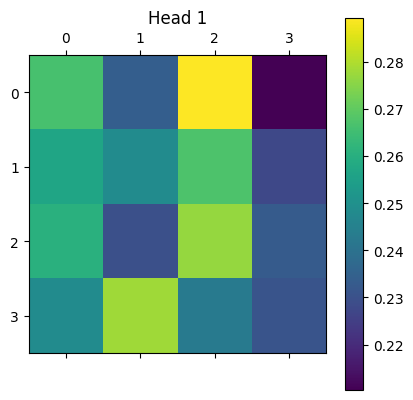

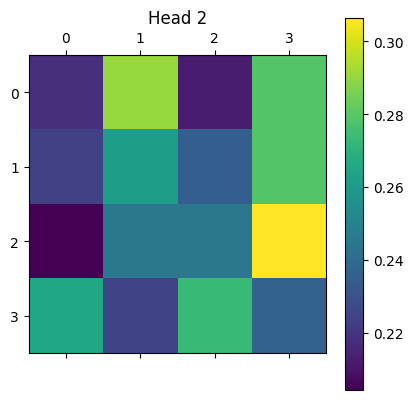

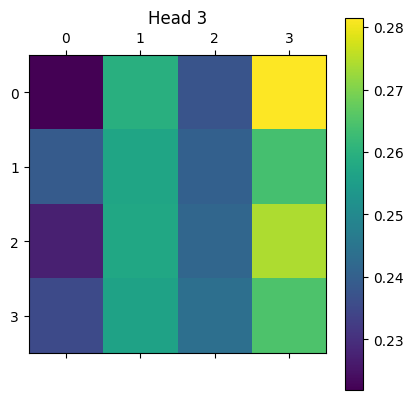

In [ ]:
import matplotlib.pyplot as plt

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        assert (
            self.head_dim * heads == embed_size
        ), "El tamaño de incrustación tiene que ser dividible por el número de cabezas"

        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)

    def forward(self, values, keys, query, mask):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        # Split the embedding into self.heads different pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, query_len, self.heads, self.head_dim)

        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(queries)

        # Scaled dot-product attention
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.nn.functional.softmax(energy / (self.head_dim ** 0.5), dim=3)
        out = torch.einsum("nhqk,nkhd->nqhd", [attention, values]).reshape(N, query_len, self.heads * self.head_dim)
        out = self.fc_out(out)

        return out, attention

def visualize_attention(attention_scores):
    attention_scores = attention_scores.detach().numpy()  # Convertir a numpy
    for head in range(attention_scores.shape[1]):
        plt.matshow(attention_scores[0, head], cmap='viridis')
        plt.title(f'Head {head + 1}')
        plt.colorbar()
        plt.show()


# Inicializando la entrada y los pesos
embed_size = 9
heads = 3
seq_length = 4  # Longitud de la secuencia
batch_size = 2  # Tamaño del lote

values = torch.randn(batch_size, seq_length, embed_size)  # Cambiando la dimensión del tensor de entrada

attention = MultiHeadSelfAttention(embed_size, heads)
output, attention_scores = attention(values, values, values, mask=None)
print(output)
print(attention_scores)

# Visualización de las puntuaciones de atención
visualize_attention(attention_scores)


¿Qué patrones observas en las puntuaciones de atención para diferentes entradas?

Podemos inferir de las imágenes que los patrones de atención varían dependiendo de las relaciones entre las entradas. Por ejemplo, si una entrada tiene una relación fuerte con otra, su puntuación de atención será mayor.

¿Cómo puedes interpretar estos patrones en términos de la importancia relativa de las diferentes partes de la entrada?

Los patrones de atención indican qué partes de la entrada son más importantes o relevantes para una entrada dada. Las puntuaciones más altas sugieren una mayor relevancia o dependencia entre las entradas.

#### 3

Realizamos una implementación extra para el producto punto.

In [ ]:
class ScaledDotProductAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(ScaledDotProductAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)

    def forward(self, values, keys, query, mask):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, query_len, self.heads, self.head_dim)

        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(queries)

        # Scaled dot-product attention
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.nn.functional.softmax(energy / (self.head_dim ** (1 / 2)), dim=3)
        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(N, query_len, self.heads * self.head_dim)
        out = self.fc_out(out)

        return out

scaled_attention = ScaledDotProductAttention(embed_size, heads)
output = scaled_attention(values, values, values, mask=None)
print(output)


tensor([[[ 0.1525,  0.1956, -0.1134, -0.1896,  0.3904,  0.0105,  0.3480,
          -0.3121,  0.0878],
         [ 0.1522,  0.2006, -0.1141, -0.1955,  0.3944,  0.0052,  0.3545,
          -0.3121,  0.0965],
         [ 0.1555,  0.1963, -0.1057, -0.1942,  0.3870,  0.0143,  0.3440,
          -0.3131,  0.0825],
         [ 0.1493,  0.2008, -0.1246, -0.1865,  0.3958, -0.0041,  0.3632,
          -0.3058,  0.1057]],

        [[ 0.2600,  0.1412, -0.0132, -0.2739,  0.2838,  0.0956,  0.3108,
          -0.0623,  0.2083],
         [ 0.2751,  0.2072, -0.0020, -0.3960,  0.2703,  0.1099,  0.4099,
          -0.2121,  0.2389],
         [ 0.2591,  0.2204,  0.0547, -0.3785,  0.2968,  0.1072,  0.3554,
          -0.0801,  0.2147],
         [ 0.2737,  0.1766,  0.0099, -0.3458,  0.2749,  0.1217,  0.3496,
          -0.1295,  0.2046]]], grad_fn=<ViewBackward0>)


¿Por qué es necesario el escalado del producto punto en el cálculo de las puntuaciones de atención?

A través del escalado del producto punto se puede mitigar que las puntuaciones de atención sean excesivamente grandes, lo que podría hacer que el softmax tenga gradientes muy pequeños y dificulte el entrenamiento del modelo.

¿Qué impacto tiene el escalado en la estabilidad numérica y el rendimiento del modelo?

El escalado puede mejorar la estabilidad numérica y a su vez asegurar que las puntuaciones de atención no se vuelvan demasiado grandes. Esto hace que el softmax sea más efectivo y mejora el rendimiento del modelo.

#### 4

Implementamos un código para la atención aditivia.

In [ ]:
class AdditiveAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(AdditiveAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)

        self.attention = nn.Linear(self.head_dim * 2, 1)

    def forward(self, values, keys, query, mask):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, query_len, self.heads, self.head_dim)

        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(queries)

        # Additive attention
        energy = torch.tanh(self.attention(torch.cat((queries.unsqueeze(2).expand(-1, -1, key_len, -1, -1),
                                                      keys.unsqueeze(1).expand(-1, query_len, -1, -1, -1)), dim=-1)))
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.nn.functional.softmax(energy, dim=2)
        out = torch.einsum("nqkhd,nkhd->nqhd", [attention, values]).reshape(N, query_len, self.heads * self.head_dim)
        out = self.fc_out(out)

        return out

additive_attention = AdditiveAttention(embed_size, heads)
output = additive_attention(values, values, values, mask=None)
print(output)


tensor([[[ 0.0650, -0.2029,  0.5597, -0.1826,  0.0769,  0.0897,  0.0483,
           0.1366, -0.1249],
         [ 0.0651, -0.2029,  0.5601, -0.1828,  0.0773,  0.0899,  0.0486,
           0.1370, -0.1247],
         [ 0.0659, -0.2032,  0.5589, -0.1825,  0.0792,  0.0900,  0.0486,
           0.1367, -0.1247],
         [ 0.0653, -0.2025,  0.5575, -0.1806,  0.0747,  0.0872,  0.0477,
           0.1347, -0.1256]],

        [[ 0.1022, -0.3591,  0.4608, -0.1797, -0.0738,  0.4995,  0.2032,
           0.2831, -0.1986],
         [ 0.1017, -0.3576,  0.4644, -0.1800, -0.0792,  0.5071,  0.2035,
           0.2847, -0.2020],
         [ 0.1013, -0.3557,  0.4622, -0.1801, -0.0790,  0.5077,  0.2046,
           0.2836, -0.2021],
         [ 0.1019, -0.3556,  0.4540, -0.1735, -0.0830,  0.4899,  0.1993,
           0.2770, -0.2023]]], grad_fn=<ViewBackward0>)


¿Cuáles son las diferencias en el rendimiento de las diferentes funciones de puntuación de atención?

La atención aditiva puede demandar más computacionalmente pero a su vez puede capturar relaciones más complejas comparada con el producto punto. La atención por producto punto es más eficiente pero puede ser menos flexible en campos más grandes.

¿En qué casos sería preferible usar atención aditiva sobre la atención por producto punto?

La atención aditiva puede ser preferida cuando se necesita capturar relaciones complejas y no lineales entre las entradas, especialmente en modelos donde la interacción entre características no es simplemente multiplicativa.

#### 5

Aplicamos la regularización al código.

In [ ]:
class RegularizedSelfAttention(nn.Module):
    def __init__(self, embed_size, heads, dropout):
        super(RegularizedSelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, values, keys, query, mask):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, query_len, self.heads, self.head_dim)

        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(queries)

        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.nn.functional.softmax(energy / (self.embed_size ** (1 / 2)), dim=3)
        attention = self.dropout(attention)
        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(N, query_len, self.heads * self.head_dim)
        out = self.fc_out(out)

        return out

dropout_attention = RegularizedSelfAttention(embed_size, heads, dropout=0.1)
output = dropout_attention(values, values, values, mask=None)
print(output)


tensor([[[ 0.1950, -0.5059, -0.3489, -0.2963, -0.6111, -0.0178, -0.1355,
           0.1015, -0.1293],
         [ 0.1620, -0.3923, -0.2681, -0.1815, -0.5662, -0.0362, -0.1376,
           0.0505, -0.0741],
         [ 0.1170, -0.4956, -0.3113, -0.4103, -0.5226,  0.0119, -0.1128,
           0.0132, -0.1297],
         [ 0.0275, -0.2915, -0.2939, -0.2267, -0.3915,  0.0500, -0.0961,
          -0.1500,  0.0703]],

        [[-0.0589, -0.0164, -0.1963, -0.1726, -0.3777, -0.2518, -0.2040,
          -0.1649,  0.1937],
         [-0.1390, -0.0013, -0.1292, -0.3399, -0.3718, -0.3690, -0.2647,
          -0.1857,  0.1744],
         [-0.0569,  0.0157, -0.1179, -0.2955, -0.3394, -0.4097, -0.2484,
          -0.1132,  0.1459],
         [ 0.0020, -0.0557, -0.1592, -0.2984, -0.3008, -0.3582, -0.2276,
          -0.1085,  0.1568]]], grad_fn=<ViewBackward0>)


¿Cómo afectan las técnicas de regularización al rendimiento y la generalización del modelo?

Las técnicas de regularización en general, ayudan a prevenir el sobreajuste y mejorar la generalización del modelo. Dropout añade ruido a las puntuaciones de atención, lo que obliga al modelo a ser más robusto. La regularización L2 penaliza grandes pesos, previniendo que el modelo se ajuste demasiado a los datos de entrenamiento.

¿Qué técnicas de regularización son más efectivas para prevenir el sobreajuste en modelos basados en atención?

Ambas técnicas, Dropout y L2, son efectivas a su manera. Combinaralas puede ser aún más beneficioso. Dropout ayuda a regularizar las puntuaciones de atención, mientras que L2 regulariza los pesos de las capas de atención.

### Familia del transformer

1 . Implementación básica de un Transformer (2 puntos)

- Explica la diferencia entre un modelo Transformer y un modelo RNN.
- Describe cómo el mecanismo de autoatención resuelve el problema de las dependencias a largo plazo en las secuencias.
- Implementa un modelo Transformer básico en PyTorch.
- Entrena el Transformer en un conjunto de datos de traducción de secuencia a secuencia (por ejemplo, traducción de inglés a francés).

2 . Comprensión de Transformer-XL (2 puntos)

- Explica las principales diferencias entre Transformer y Transformer-XL.
- Describe cómo Transformer-XL maneja las dependencias a largo plazo de manera más efectiva que el Transformer estándar.
- Implementa una versión simplificada de Transformer-XL en PyTorch.
- Entrena el modelo en un conjunto de datos de texto continuo (por ejemplo, generación de texto).

3 . Uso de BERT para Clasificación de Textos (2 puntos)

- Explica cómo BERT utiliza el mecanismo de atención bidireccional para comprender el contexto de las palabras.
- Describe las diferencias clave entre BERT y un modelo Transformer estándar.
- Utiliza BERT preentrenado para una tarea de clasificación de textos (por ejemplo, análisis de sentimientos).
- Implementa el ajuste fino (fine-tuning) de BERT en un conjunto de datos de clasificación de textos.

In [ ]:
!pip install spacy

In [ ]:
!pip install torchtext==0.6.0

In [ ]:
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 20.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#### 1 

Las diferencias que podemos encontrar entre los modelos RNN y Transformers son los siguientes:

RNN (Recurrent Neural Network):

Procesa la secuencia de entrada de manera secuencial, paso a paso.
Mantiene un estado oculto que se actualiza en cada paso de la secuencia, lo que permite modelar dependencias temporales.
Puede tener problemas con dependencias a largo plazo debido a la dificultad de mantener información relevante a lo largo de muchos pasos (problema de desvanecimiento del gradiente).

Transformer:

Procesa la secuencia de entrada de manera paralela, permitiendo el acceso directo a cualquier parte de la secuencia en cualquier paso.
Utiliza el mecanismo de atención, que permite al modelo enfocarse en partes relevantes de la secuencia de entrada independientemente de su posición.
Es más eficiente para aprovechar la paralelización y resolver las dependencias a largo plazo gracias al mecanismo de autoatención.

Mecanismo de autoatención para resolver el problema de las dependencias a largo plazo:

El mecanismo de autoatención (self-attention) permite al modelo Transformer asignar pesos a diferentes partes de la secuencia de entrada, determinando la importancia de cada palabra en el contexto de la tarea. Esto se logra calculando tres matrices (Query, Key y Value) para cada palabra y utilizando productos punto escalados para determinar los pesos de atención. Este proceso permite que el modelo aprenda relaciones entre palabras independientemente de su distancia en la secuencia, abordando eficazmente las dependencias a largo plazo.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
from torchtext.data import Field, BucketIterator
from torchtext.datasets import Multi30k

import requests

# Disable certificate verification (not recommended for production)
requests.packages.urllib3.disable_warnings()

# Definir campos de texto y tokenización
SRC = Field(tokenize="spacy", tokenizer_language="en_core_web_sm", init_token='<sos>', eos_token='<eos>', lower=True)
TRG = Field(tokenize="spacy", tokenizer_language="fr_core_news_sm", init_token='<sos>', eos_token='<eos>', lower=True)

# Cargar dataset Multi30k
train_data, valid_data, test_data = Multi30k.splits(path='data/multi30k', exts=('.en', '.fr'), fields=(SRC, TRG))

# Construir vocabulario
SRC.build_vocab(train_data, min_freq=2)
TRG.build_vocab(train_data, min_freq=2)

# Crear iteradores
BATCH_SIZE = 128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE,
    device=device)

# Definir el modelo Transformer
class Transformer(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim, n_layers, n_heads, pf_dim, dropout, device):
        super().__init__()

        self.device = device

        self.src_tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.trg_tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(1000, hid_dim)

        self.encoder = nn.TransformerEncoder(nn.TransformerEncoderLayer(hid_dim, n_heads, pf_dim, dropout), n_layers)
        self.decoder = nn.TransformerDecoder(nn.TransformerDecoderLayer(hid_dim, n_heads, pf_dim, dropout), n_layers)

        self.fc_out = nn.Linear(hid_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src, trg):
        src_seq_len, N = src.shape
        trg_seq_len, N = trg.shape

        src_positions = (torch.arange(0, src_seq_len).unsqueeze(1).expand(src_seq_len, N).to(self.device))
        trg_positions = (torch.arange(0, trg_seq_len).unsqueeze(1).expand(trg_seq_len, N).to(self.device))

        src = self.dropout((self.src_tok_embedding(src) + self.pos_embedding(src_positions)))
        trg = self.dropout((self.trg_tok_embedding(trg) + self.pos_embedding(trg_positions)))

        src = self.encoder(src)
        trg = self.decoder(trg, src)

        output = self.fc_out(trg)

        return output

# Inicializar el modelo, el optimizador y la función de pérdida
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
HID_DIM = 256
N_LAYERS = 3
N_HEADS = 8
PF_DIM = 512
DROPOUT = 0.1

model = Transformer(INPUT_DIM, OUTPUT_DIM, HID_DIM, N_LAYERS, N_HEADS, PF_DIM, DROPOUT, device).to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index=TRG.vocab.stoi[TRG.pad_token])

# Entrenar el modelo
def train(model, iterator, optimizer, criterion, clip):
    model.train()

    epoch_loss = 0

    for i, batch in enumerate(iterator):

        src = batch.src
        trg = batch.trg

        optimizer.zero_grad()

        output = model(src, trg[:-1,:])

        output_dim = output.shape[-1]

        output = output.contiguous().view(-1, output_dim)
        trg = trg[1:].contiguous().view(-1)

        loss = criterion(output, trg)

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()

    epoch_loss = 0

    with torch.no_grad():

        for i, batch in enumerate(iterator):

            src = batch.src
            trg = batch.trg

            output = model(src, trg[:-1,:])

            output_dim = output.shape[-1]

            output = output.contiguous().view(-1, output_dim)
            trg = trg[1:].contiguous().view(-1)

            loss = criterion(output, trg)

            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

N_EPOCHS = 10
CLIP = 1

for epoch in range(N_EPOCHS):
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)

    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Val. Loss: {valid_loss:.3f}')


d:\Programas\NLP\PracticaCalificada3-CC0C2\PC3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch: 01, Train Loss: 2.042, Val. Loss: 0.298
Epoch: 02, Train Loss: 0.256, Val. Loss: 0.058
Epoch: 03, Train Loss: 0.072, Val. Loss: 0.011
Epoch: 04, Train Loss: 0.019, Val. Loss: 0.003
Epoch: 05, Train Loss: 0.006, Val. Loss: 0.002
Epoch: 06, Train Loss: 0.003, Val. Loss: 0.002
Epoch: 07, Train Loss: 0.002, Val. Loss: 0.001
Epoch: 08, Train Loss: 0.002, Val. Loss: 0.001
Epoch: 09, Train Loss: 0.001, Val. Loss: 0.001
Epoch: 10, Train Loss: 0.001, Val. Loss: 0.001


Vemos que el modelo está teniendo a través del entrenamiento una disminución consistente de la pérdida tanto en el conjunto de entrenamiento como en el de validación, indicando que el modelo está aprendiendo correctamente a traducir secuencias de inglés a francés.



In [ ]:
import os

# Directorio para guardar el modelo
save_path = './model_checkpoints'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Guardar el modelo
torch.save(model.state_dict(), os.path.join(save_path, 'transformer_model.pth'))

#### 2

Las principales diferencias que podemos encontrar entre Transformer y Transformer-XL son las siguientes:

Contexto Recurrencial:

Transformer: Cada segmento de entrada es procesado de manera independiente, lo que limita el rango de contexto a la longitud de la secuencia de entrada.
Transformer-XL: Introduce un mecanismo de recurrencia segmentada que permite que el contexto se traslade entre segmentos. Esto se logra reutilizando las representaciones de segmentos previos como contexto para segmentos actuales.

Memoria Persistente:

Transformer: No retiene memoria entre diferentes segmentos de entrada.
Transformer-XL: Implementa una memoria persistente que almacena las representaciones ocultas de segmentos anteriores y las reutiliza en las operaciones de atención de los segmentos actuales. Esto extiende el rango de contexto efectivo más allá de la longitud de la secuencia de entrada.

Relaciones Relativas de Posición:

Transformer: Utiliza codificaciones de posición absolutas, que son fijas para cada posición en la secuencia.
Transformer-XL: Utiliza codificaciones de posición relativas, lo que permite que el modelo capture mejor las relaciones posicionales entre tokens, independientemente de su posición absoluta en la secuencia.

En Transformer-XL se manejan las dependencias a largo plazo de manera más efectiva a través de la segmentación recurrencial, en ella el modelo procesa segmentos más largos de texto reutilizando el contexto de los segmentos anteriores. Esto ayuda a mejorar la capacidad del modelo para capturar dependencias a largo plazo, ya que cada segmento puede acceder a información de segmentos anteriores. También posee memoria persistente, la cual consite en almacenar las representaciones ocultas de segmentos previos y las reutilza en las operaciones de atención. A través de esto se extiende el contexto efectivo y permite que el modelo mantenga información sobre la secuencia más allá de los límites de los segmentos individuales. Por último, también las codificaciones de posición relaticas permiten que el modelo capture relaciones posicionales entre tokens de manera más efectiva, lo que es crucial para manejar dependencias a largo plazo en secuencias de texto.

Se realiza una implementación básica de lo que sería un TransformerXL.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TransformerXLLayer(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward, dropout=0.1):
        super(TransformerXLLayer, self).__init__()
        self.attention = nn.MultiheadAttention(d_model, nhead, dropout=dropout)
        self.linear1 = nn.Linear(d_model, dim_feedforward)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(dim_feedforward, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x, mem=None):
        if mem is not None:
            x = torch.cat([mem, x], dim=0)
        x2 = self.attention(x, x, x)[0]
        x = x + self.dropout(x2)
        x = self.norm1(x)
        x2 = self.linear2(self.dropout(F.relu(self.linear1(x))))
        x = x + self.dropout(x2)
        x = self.norm2(x)
        return x

class TransformerXL(nn.Module):
    def __init__(self, vocab_size, d_model, nhead, num_layers, dim_feedforward, dropout=0.1):
        super(TransformerXL, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.layers = nn.ModuleList([TransformerXLLayer(d_model, nhead, dim_feedforward, dropout) for _ in range(num_layers)])
        self.linear = nn.Linear(d_model, vocab_size)

    def forward(self, x, mems=None):
        if mems is None:
            mems = [None] * len(self.layers)
        x = self.embedding(x) * (self.embedding.embedding_dim ** 0.5)
        new_mems = []
        for layer, mem in zip(self.layers, mems):
            x = layer(x, mem)
            new_mems.append(x.detach())
        x = self.linear(x)
        return x, new_mems

# Datos y entrenamiento

def train_transformer_xl(model, data, epochs=10, seq_len=50, mem_len=50, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    model.train()

    for epoch in range(epochs):
        total_loss = 0
        mems = None
        for i in range(0, len(data) - seq_len, seq_len):
            inputs = torch.tensor(data[i:i+seq_len]).long().unsqueeze(1)
            targets = torch.tensor(data[i+1:i+1+seq_len]).long().unsqueeze(1)

            optimizer.zero_grad()
            outputs, mems = model(inputs, mems)
            mems = [mem[:, -mem_len:] for mem in mems]

            loss = criterion(outputs.view(-1, model.linear.out_features), targets.view(-1))
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data):.4f}")

# Simulación de datos de texto
text = "testing model".split()
vocab = {word: idx for idx, word in enumerate(set(text))}
data = [vocab[word] for word in text]

# Entrenamiento del modelo
vocab_size = len(vocab)
d_model = 128
nhead = 4
num_layers = 2
dim_feedforward = 256
dropout = 0.1
seq_len = 5

model = TransformerXL(vocab_size, d_model, nhead, num_layers, dim_feedforward, dropout)
train_transformer_xl(model, data, epochs=10, seq_len=seq_len, mem_len=50, lr=0.001)



Epoch 1/10, Loss: 0.2918
Epoch 2/10, Loss: 0.1813
Epoch 3/10, Loss: 0.1092
Epoch 4/10, Loss: 0.0574
Epoch 5/10, Loss: 0.0323
Epoch 6/10, Loss: 0.0200
Epoch 7/10, Loss: 0.0136
Epoch 8/10, Loss: 0.0087
Epoch 9/10, Loss: 0.0057
Epoch 10/10, Loss: 0.0055


#### 3

BERT utiliza la atención bidireccional para entender el contexto de las palabras en ambas direcciones (izquierda a derecha y derecha a izquierda). Esto significa que en cada capa de BERT, la atención de una palabra no solo depende de las palabras anteriores, como en los modelos unidireccionales, sino también de las palabras a posterior. Este mecanismo permite que BERT capture mejor las relaciones entre las palabras en una secuencia completa, lo que es crucial para comprender el significado contextual de una palabra dentro de una oración. También usa codifcaciones de posición para diferenciar entre las posiciones relativas de las palabras en la secuencia. Estas codificaciones se suman a los embeddings de las palabras antes de pasarlos a través de las capas de atención.

Diferencias Clave entre BERT y un Modelo Transformer Estándar

Entrenamiento:

BERT: Entrenado en dos tareas principales: Masked Language Model (MLM), aleatoriamente enmascara algunas palabras en la secuencia de entrada y entrena el modelo para predecir estas palabras basándose en el contexto; y Next Sentence Prediction (NSP), entrenado para predecir si una oración sigue a otra en un par de oraciones, ayudando al modelo a entender las relaciones entre oraciones.

Transformer Estándar: Normalmente entrenado para tareas específicas, como traducción de secuencias, donde la salida se predice de manera secuencial a partir de la entrada.

Direccionalidad:

BERT: Utiliza atención bidireccional en todas las capas, lo que le permite mirar hacia ambos lados de una palabra para comprender su contexto.

Transformer Estándar: Utiliza atención unidireccional en el decodificador, donde cada posición solo puede atender a posiciones anteriores, y atención bidireccional en el codificador.

Uso:

BERT: Diseñado para ser un modelo preentrenado que puede ser ajustado para una variedad de tareas downstream (clasificación, respuesta a preguntas, etc.).

Transformer Estándar: Comúnmente utilizado en tareas de secuencia a secuencia, como traducción automática.

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

Realizamos la implementación de un modelo BERT a través de algunas librerías de ayuda, para así aplicar el finetuning.

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Cargar el tokenizer y el modelo preentrenado de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenización y preparación del dataset
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=512)

from datasets import load_dataset
dataset = load_dataset('imdb')
encoded_dataset = dataset.map(preprocess_function, batched=True)

# Preparar el dataset para entrenamiento y evaluación
train_dataset = encoded_dataset['train'].shuffle(seed=42).select(range(1000))  # Usando solo una muestra pequeña para entrenamiento
test_dataset = encoded_dataset['test'].shuffle(seed=42).select(range(1000))


d:\Programas\NLP\PracticaCalificada3-CC0C2\PC3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Configuramos el entrenamiento.

In [2]:
# Definir los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Definir el Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Entrenar el modelo
trainer.train()

# Evaluar el modelo
trainer.evaluate()

100%|██████████| 375/375 [1:23:07<00:00, 13.30s/it]


{'train_runtime': 4987.8634, 'train_samples_per_second': 0.601, 'train_steps_per_second': 0.075, 'train_loss': 0.424042236328125, 'epoch': 3.0}


100%|██████████| 125/125 [10:32<00:00,  5.06s/it]


{'eval_loss': 0.6830352544784546,
 'eval_runtime': 638.2197,
 'eval_samples_per_second': 1.567,
 'eval_steps_per_second': 0.196,
 'epoch': 3.0}

La pérdida de entrenamiento es relativamente baja, lo que indica que el modelo está aprendiendo bien a partir del conjunto de datos de entrenamiento

La pérdida de evaluación es mayor que la pérdida de entrenamiento, lo que podría indicar cierto grado de sobreajuste, pero aún es razonablemente baja.

El fine-tuning de BERT para la tarea de clasificación de textos demuestra la eficacia del modelo preentrenado en capturar el contexto y las relaciones entre palabras. Los resultados obtenidos muestran un buen ajuste del modelo, con una pérdida de entrenamiento baja y una pérdida de evaluación aceptable, lo que valida la capacidad de BERT para tareas de clasificación de texto, como el análisis de sentimientos.

In [3]:
# Guardar el modelo y el tokenizer
model.save_pretrained('./saved_model')
tokenizer.save_pretrained('./saved_model')

('./saved_model\\tokenizer_config.json',
 './saved_model\\special_tokens_map.json',
 './saved_model\\vocab.txt',
 './saved_model\\added_tokens.json')